# Customer Churn Detection of Ecommerce Business

### Business Sense of the churn detection and its usage

Suppose an e-commerce business has 100,000 customers and has developed a churn detection model using machine learning techniques to identify customers who are at risk of churning. The company uses a recall score to evaluate the performance of the model and aims to achieve a recall score of 0.8 or higher.

Suppose that the company collects data on customer behavior, such as purchase history, time since last purchase, and frequency of purchases. The company uses this data to train a logistic regression model for churn detection and evaluates its performance using cross-validation. The final model achieves a recall score of 0.85 on a held-out test set.

The goal of the assignment is to evaluate the model's performance on the dataset and predict the cost of churn customers in the end.

## Data Description

1) CustomerID: Unique customer ID <br>
2) Churn: Churn Flag <br>
3) Tenure: Tenure of customer in organization <br>
4) PreferredLoginDevice: Preferred login device of customer <br>
5) CityTier: City tier<br>
6) WarehouseToHome: Distance in between warehouse to home of customer<br>
7) PreferredPaymentMode: Preferred payment method of customer<br>
8) Gender: Gender of customer<br>
9) HourSpendOnApp: Number of hours spend on mobile application or website<br>
10) NumberOfDeviceRegistered: Total number of deceives is registered on particular customer<br>
11) PreferedOrderCat: Preferred order category of customer in last month<br>
12) SatisfactionScore: Satisfactory score of customer on service<br>
13) MaritalStatus: Marital status of customer<br>
14) NumberOfAddress: Total number of added added on particular customer<br>
15) Complain: Any complaint has been raised in last month<br>
16) OrderAmountHikeFromlastYear: Percentage increases in order from last year<br>
17) CouponUsed: Total number of coupon has been used in last month<br>
18) OrderCount: Total number of orders has been places in last month<br>
19) DaySinceLastOrder: Day Since last order by customer<br>
20) CashbackAmount: Average cashback in last month<br>

## 1.0 Import and install python libraries


In [1]:
# import numpy and pandas libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## 2.0 Set Random Seed

In [3]:
# set random seed to ensure that results are repeatable
np.random.seed(1)

## 3.0 Load data 

In [4]:
# load data
ecomm = pd.read_excel("ecommerce.xlsx", sheet_name='E Comm')

## 4.0 Initial exploration of the data

We have a number of input variables and one target variable.

Will address these tasks in data exploration
1. How many rows and columns
2. How much of a problem do we have with na's?
3. What types of data are there?
4. What types of data are stored in columns
    1. identify which variables are numeric and may need to be standardized later
    2. identify which variables are categorical and may need to be transformed using and encoders such as one-hot-encoder.
5. Identify errors in the data - 

In [5]:
#Let's look at the shape of the data frame. 

In [6]:
ecomm.shape

(5630, 20)

In [7]:
# look at the data
ecomm.head(5) 

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [8]:
# generate a basic summary of the data
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [9]:
# from the abovewe can say that there are missing values

In [10]:
# generate a statistical summary of the numeric value in the data
ecomm.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [11]:
# Check the missing values by summing the total na's for each variable
ecomm.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [12]:
ecomm.describe(include='O')  ## all categorical variables (object type)  and its stats

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [13]:
category_var_list=[]
num_var=[]
for i in ecomm.columns:
  if ecomm[i].dtype=='object':
    category_var_list.append(i)
  else:
    num_var.append(i)
print('categorical variables = ',category_var_list)
print('Numrical Variable = ',num_var)

categorical variables =  ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
Numrical Variable =  ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [14]:
# list of these catagorical variables
category_var_list

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

## 5. Exploratory Data Analysis

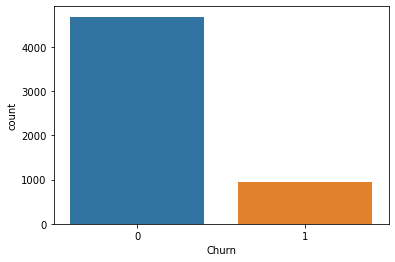

In [15]:
sns.countplot(x="Churn",data=ecomm)  ## target variable is imbalanced and it is addressed using undersampling technique on the training set
plt.show()


In [16]:
## Check the distribution of the numerical columns

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'CityTier'}>],
       [<AxesSubplot:title={'center':'WarehouseToHome'}>,
        <AxesSubplot:title={'center':'HourSpendOnApp'}>,
        <AxesSubplot:title={'center':'NumberOfDeviceRegistered'}>,
        <AxesSubplot:title={'center':'SatisfactionScore'}>],
       [<AxesSubplot:title={'center':'NumberOfAddress'}>,
        <AxesSubplot:title={'center':'Complain'}>,
        <AxesSubplot:title={'center':'OrderAmountHikeFromlastYear'}>,
        <AxesSubplot:title={'center':'CouponUsed'}>],
       [<AxesSubplot:title={'center':'OrderCount'}>,
        <AxesSubplot:title={'center':'DaySinceLastOrder'}>,
        <AxesSubplot:title={'center':'CashbackAmount'}>, <AxesSubplot:>]],
      dtype=object)

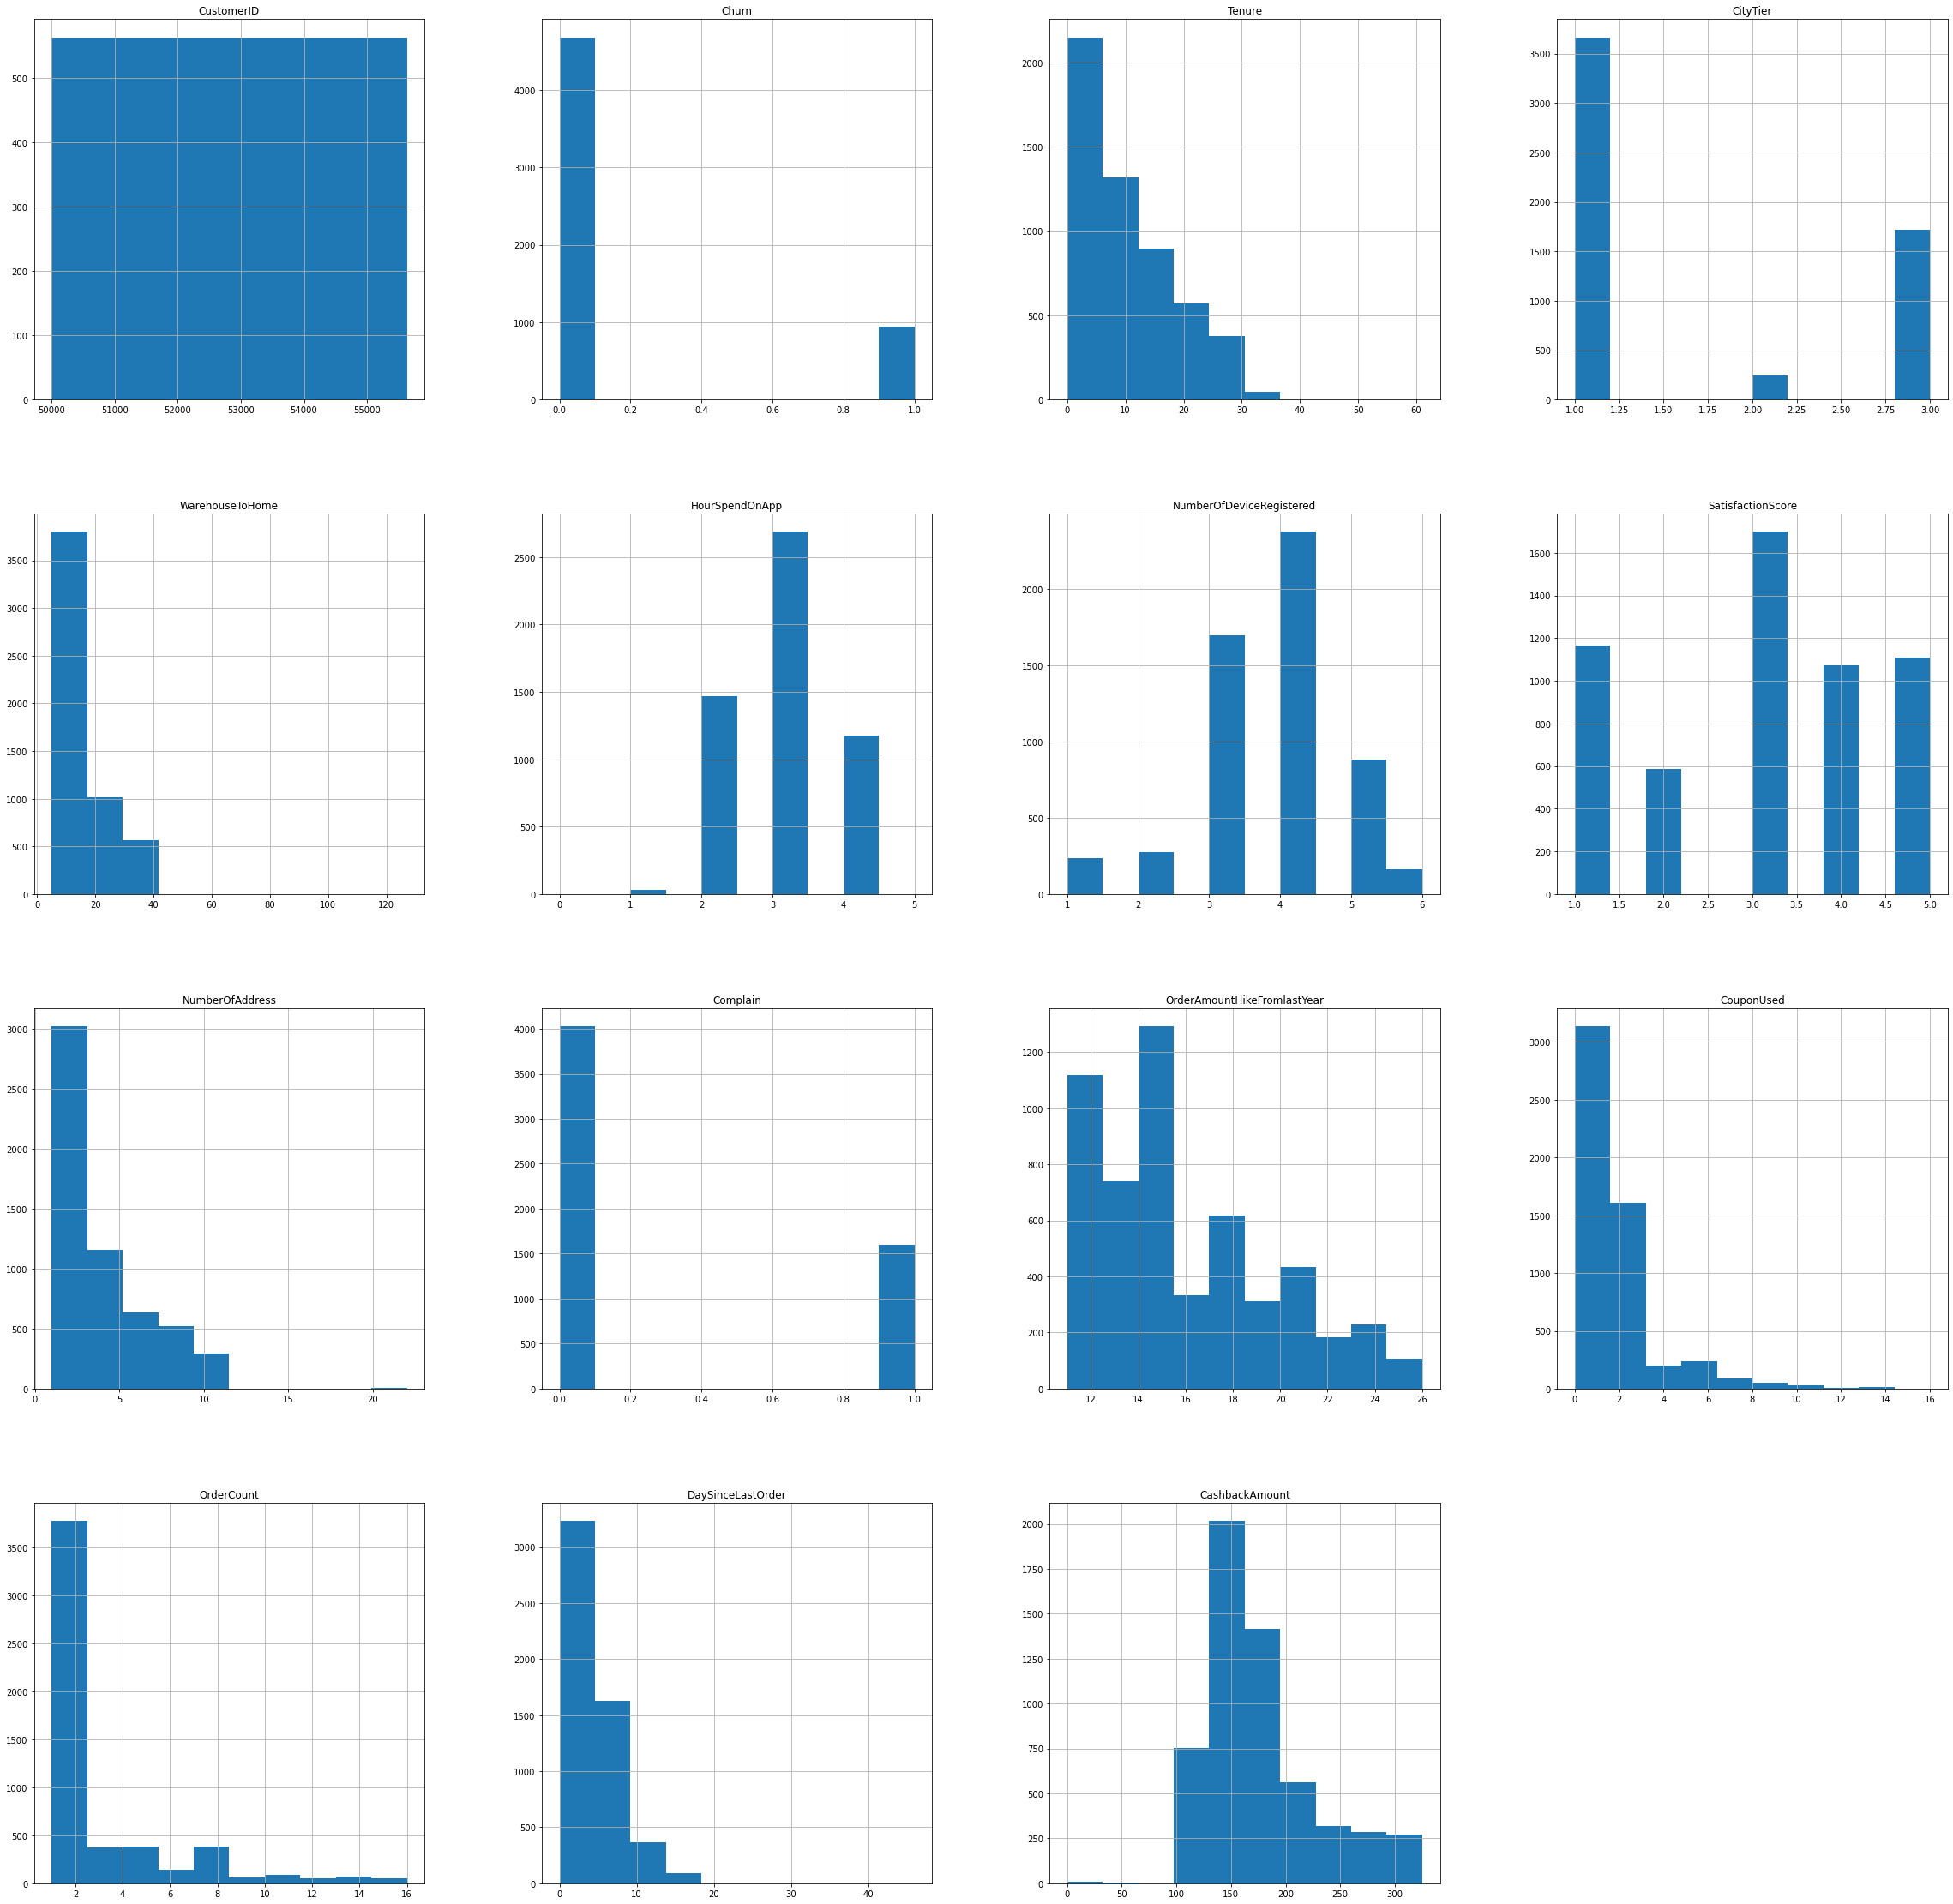

In [17]:
ecomm[num_var].hist(figsize=(40,40))

In [18]:
## Correlation check using corrplot

C:\Users\CHANDAN PATEL\AppData\Local\Temp\ipykernel_13112\3952160370.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ecomm.corr()


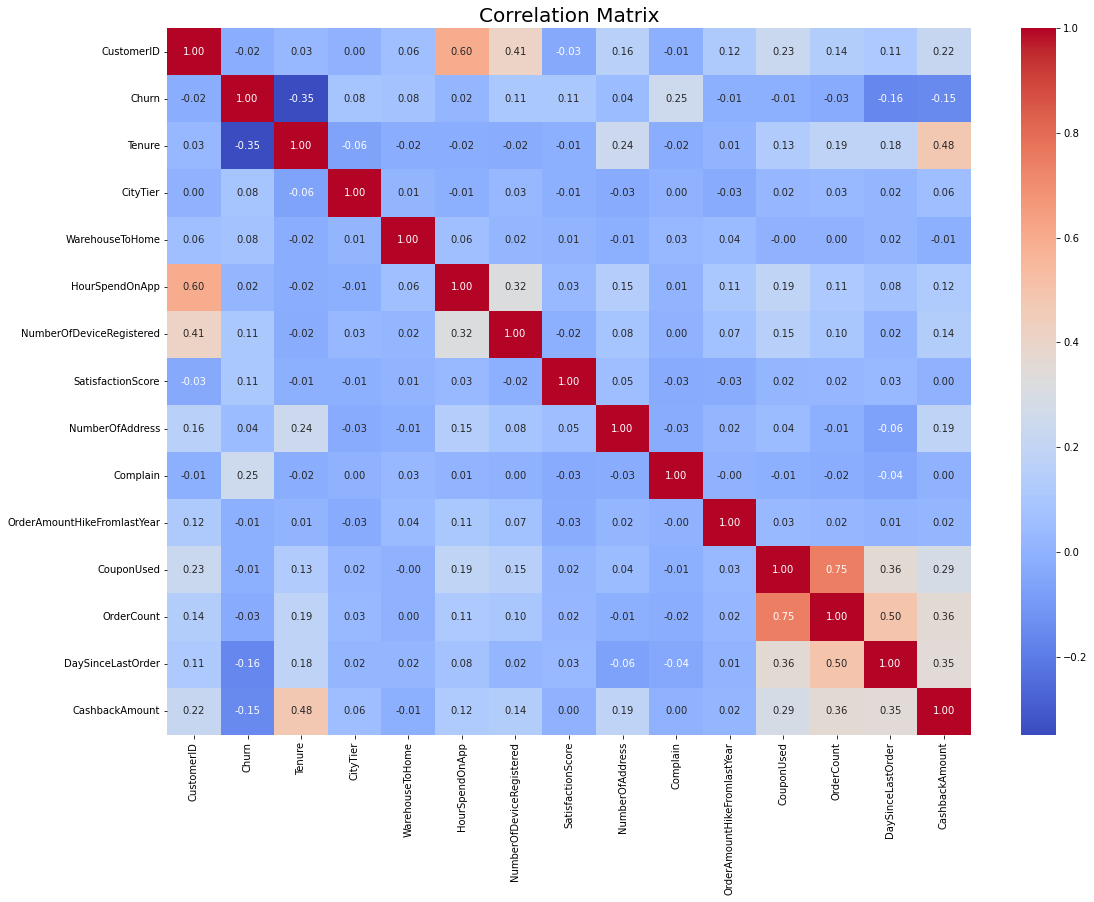

In [19]:
ecomm[num_var].corr()

ecomm.corr()

# Correlation Matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(ecomm[num_var].corr(), annot=True, fmt=".2f", ax=ax, cmap="coolwarm")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

### Summary the findings from our initial evaluation of the data

* We have 5 categorical variables
* We have 7 variables that have missing values
* There doesn't seem to be a problem with the catogorical class names.

## 5.0 Process the data



### 5.1  Data prepartion work done before split

Tasks at this stage include:
1. Drop any columns/features 
2. Drop any observations (rows) due to missing na's (if applicable).
3. Conduct proper encoding of categorical variables

#### Drop any columns/variables we will not be using

In [20]:
## Drop variables which are not relevant to churn predictions like;
# CustomerID
# PreferredLoginDevice
# WarehouseToHome
# PreferredPaymentMode
# NumberOfAddress
ecomm.drop(['CustomerID', 'PreferredPaymentMode', 'WarehouseToHome', 'PreferredLoginDevice','NumberOfAddress'], axis=1, inplace = True)

#### Drop observations with too many NA's

Now, let's remove any rows that have more than one missing value. 

In [21]:
ecomm = ecomm[ecomm.isnull().sum(axis=1) < 3]
ecomm

,Churn,Tenure,CityTier,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,3,Female,3.0,3,Laptop & Accessory,2,Single,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,1,Male,3.0,4,Mobile,3,Single,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,1,Male,2.0,4,Mobile,3,Single,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,3,Male,2.0,4,Laptop & Accessory,5,Single,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,1,Male,NaN,3,Mobile,5,Single,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,1,Male,3.0,2,Laptop & Accessory,1,Married,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,1,Male,3.0,5,Fashion,5,Married,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,1,Male,3.0,2,Laptop & Accessory,4,Married,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,3,Male,4.0,5,Laptop & Accessory,4,Married,0,15.0,2.0,2.0,9.0,178.90


In [22]:
# finding the percentage of missing values after removing the rows if missing values are more than 1
ecomm.isnull().mean() * 100

Churn                          0.000000
Tenure                         4.689165
CityTier                       0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

In [23]:
# We will impute the missing values with median. 

In [24]:
# investigage how many rows remain 
ecomm.shape

(5630, 15)

In [25]:
category_var_list=[]
num_var=[]
for i in ecomm.columns:
  if ecomm[i].dtype=='object':
    category_var_list.append(i)
  else:
    num_var.append(i)
print('categorical variables = ',category_var_list)
print('Numrical Variables = ',num_var)

categorical variables =  ['Gender', 'PreferedOrderCat', 'MaritalStatus']
Numrical Variables =  ['Churn', 'Tenure', 'CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


#### Encode our categorical variables

from above we learnt that there are no missing values in the categorical variables

In [26]:
# explore the categorical variable values 
for cat in category_var_list:
    print(f"Category: {cat} Values: {ecomm[cat].unique()}")

Category: Gender Values: ['Female' 'Male']
Category: PreferedOrderCat Values: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Category: MaritalStatus Values: ['Single' 'Divorced' 'Married']


In [27]:
ecomm = ecomm.join(pd.get_dummies(ecomm['Gender'], prefix='Gender', drop_first=True))
ecomm.drop('Gender', axis=1, inplace = True)

In [28]:
ecomm = ecomm.join(pd.get_dummies(ecomm['MaritalStatus'], prefix='MaritalStatus', drop_first=True))
ecomm.drop('MaritalStatus', axis=1, inplace = True)

In [29]:
labelencoder = LabelEncoder()
ecomm['PreferedOrderCat'] = labelencoder.fit_transform(ecomm['PreferedOrderCat'])

In [30]:
# explore the dataframe columns to verify encoding and dropped columns
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 0 to 5629
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   CityTier                     5630 non-null   int64  
 3   HourSpendOnApp               5375 non-null   float64
 4   NumberOfDeviceRegistered     5630 non-null   int64  
 5   PreferedOrderCat             5630 non-null   int32  
 6   SatisfactionScore            5630 non-null   int64  
 7   Complain                     5630 non-null   int64  
 8   OrderAmountHikeFromlastYear  5365 non-null   float64
 9   CouponUsed                   5374 non-null   float64
 10  OrderCount                   5372 non-null   float64
 11  DaySinceLastOrder            5323 non-null   float64
 12  CashbackAmount               5630 non-null   float64
 13  Gender_Male       

### 5.2 Split data (train/test)

In [31]:
# split 70:30
train_df, test_df = train_test_split(ecomm, test_size=0.3)

# to reduce repetition in later code, create variables to represent the columns
# that are our predictors and target
target = 'Churn'
predictors = list(ecomm.columns)
predictors.remove(target)

### 5.3  Data prepartion after the data split

performed the following:
1) impute any missing numeric values using the mean of the variable
2) remove differences of scale by standardizing the numerica variables

#### Impute missing values

In [32]:
check1=train_df.isna().sum()[train_df.isna().sum() > 0];check1  ## this is one series that's why below code used .index

Tenure                         181
HourSpendOnApp                 175
OrderAmountHikeFromlastYear    192
CouponUsed                     187
OrderCount                     181
DaySinceLastOrder              222
dtype: int64

In [33]:
numeric_cols_with_nas = list(train_df.isna().sum()[train_df.isna().sum() > 0].index)
numeric_cols_with_nas

['Tenure',
 'HourSpendOnApp',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']

We can see from the code above that there are 4 variables (columns) that contain missing numeric values (we've already taken care of any missing values in the catagorical variables earlier).

In [34]:
imputer = SimpleImputer(strategy="median")

train_df[numeric_cols_with_nas] = imputer.fit_transform(train_df[numeric_cols_with_nas])
test_df[numeric_cols_with_nas] = imputer.transform(test_df[numeric_cols_with_nas])

#### Standardize numeric values

Now, let's create a common scale between the numberic columns by standardizing each numeric column

In [35]:
num_var ## Numberic Columns to standardize except the 

['Churn',
 'Tenure',
 'CityTier',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [36]:
# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
cols_to_stdize = ['Tenure','CityTier','HourSpendOnApp','NumberOfDeviceRegistered',
                  'SatisfactionScore','Complain','OrderAmountHikeFromlastYear',
                  'CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']                
               
# Transform the predictors of training and validation sets
train_df[cols_to_stdize] = scaler.fit_transform(train_df[cols_to_stdize]) # train_predictors is not a numpy array


test_df[cols_to_stdize] = scaler.transform(test_df[cols_to_stdize]) # validation_target is now a series object


## 6.0 Save the data

In [37]:
train_X = train_df[predictors]
train_y = train_df[target] # train_target is now a series objecttrain_df.to_csv('airbnb_train_df.csv', index=False)
test_X = test_df[predictors]
test_y = test_df[target] # validation_target is now a series object

train_df.to_csv('ecomm_train_df.csv', index=False)
train_X.to_csv('ecomm_train_X.csv', index=False)
train_y.to_csv('ecomm_train_y.csv', index=False)
test_df.to_csv('ecomm_test_df.csv', index=False)
test_X.to_csv('ecomm_test_X.csv', index=False)
test_y.to_csv('ecomm_test_y.csv', index=False)